In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [25]:
img = cv2.imread("./images/lena_noise_512.png", 0)

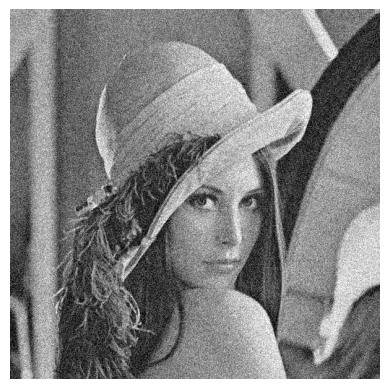

In [26]:
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

In [27]:
k = 9
mask = np.ones([k, k], dtype = 'float16') 
mask = mask/pow(k,2)
print(mask)

[[0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]
 [0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344 0.012344
  0.012344]]


In [28]:
bd = int(k/2)
print(bd)

4


In [29]:
f = img.copy().astype(np.float16)

In [30]:
out = np.zeros_like(img, dtype = 'float16')

In [31]:
(m,n) = img.shape
print(m,n,bd)

512 512 4


In [32]:
for i in range(bd,m-bd):
    for j in range(bd,n-bd):
        sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
        out[i, j] = np.multiply(sub_f, mask).sum()    

In [33]:
out = out.astype(np.uint8)

In [34]:
imgs = cv2.hconcat([img, out])

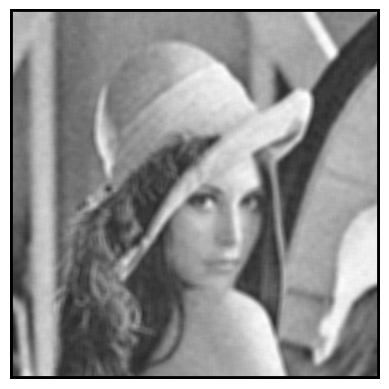

In [35]:
plt.axis("off")
plt.imshow(out, cmap='gray')
plt.show()